# Data Set
*Data set reference:

Shankar Setty, Moula Husain, Parisa Beham, Jyothi Gudavalli, Menaka Kandasamy, Radhesyam Vaddi, Vidyagouri Hemadri, J C Karure, Raja Raju, Rajan, Vijay Kumar and C V Jawahar. "Indian Movie Face Database: A Benchmark for Face Recognition Under Wide Variations"

National Conference on Computer Vision, Pattern Recognition, Image Processing and Graphics (NCVPRIPG), 2013.

In [51]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
import keras
import imageio # To read images
from PIL import Image # For image resizing
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# To load Training dataset

In [52]:
import zipfile

# Replace 'your_zip_file.zip' with the actual path to your ZIP file
zip_file_path = '/content/drive/MyDrive/Deep_Learning/Project/Age_Group_Prediction/agedetectiontrain.zip'

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the ZIP archive
    file_list = zip_ref.namelist()
    print("Files in the ZIP archive:", file_list)

    # Extract all contents to a specified directory
    extraction_path = '/content/drive/MyDrive/Deep_Learning/Project/Age_Group_Prediction/Training_data/'
    zip_ref.extractall(extraction_path)
    print("Contents extracted to:", extraction_path)

Files in the ZIP archive: ['Train/', 'train.csv', 'Train/0.jpg', 'Train/1.jpg', 'Train/100.jpg', 'Train/10000.jpg', 'Train/10001.jpg', 'Train/10004.jpg', 'Train/10007.jpg', 'Train/10008.jpg', 'Train/10009.jpg', 'Train/10011.jpg', 'Train/10013.jpg', 'Train/10015.jpg', 'Train/10016.jpg', 'Train/10017.jpg', 'Train/10018.jpg', 'Train/10019.jpg', 'Train/1002.jpg', 'Train/10021.jpg', 'Train/10023.jpg', 'Train/10025.jpg', 'Train/10026.jpg', 'Train/10027.jpg', 'Train/10028.jpg', 'Train/1003.jpg', 'Train/10030.jpg', 'Train/10031.jpg', 'Train/10034.jpg', 'Train/10035.jpg', 'Train/10036.jpg', 'Train/10038.jpg', 'Train/1004.jpg', 'Train/10040.jpg', 'Train/10041.jpg', 'Train/10043.jpg', 'Train/10045.jpg', 'Train/10046.jpg', 'Train/10047.jpg', 'Train/10048.jpg', 'Train/1005.jpg', 'Train/10050.jpg', 'Train/10051.jpg', 'Train/10053.jpg', 'Train/10055.jpg', 'Train/10056.jpg', 'Train/10057.jpg', 'Train/10058.jpg', 'Train/10059.jpg', 'Train/1006.jpg', 'Train/10061.jpg', 'Train/10062.jpg', 'Train/10063.jp

# To load testing dataset

In [53]:
import zipfile

# Replace 'your_zip_file.zip' with the actual path to your ZIP file
zip_file_path = '/content/drive/MyDrive/Deep_Learning/Project/Age_Group_Prediction/agedetectiontest.zip'

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the ZIP archive
    file_list = zip_ref.namelist()
    print("Files in the ZIP archive:", file_list)

    # Extract all contents to a specified directory
    extraction_path = '/content/drive/MyDrive/Deep_Learning/Project/Age_Group_Prediction/Testing_data/'
    zip_ref.extractall(extraction_path)
    print("Contents extracted to:", extraction_path)

Files in the ZIP archive: ['Test/', 'test.csv', 'Test/10.jpg', 'Test/1000.jpg', 'Test/10002.jpg', 'Test/10003.jpg', 'Test/10005.jpg', 'Test/10006.jpg', 'Test/1001.jpg', 'Test/10010.jpg', 'Test/10012.jpg', 'Test/10014.jpg', 'Test/10020.jpg', 'Test/10022.jpg', 'Test/10024.jpg', 'Test/10029.jpg', 'Test/10032.jpg', 'Test/10033.jpg', 'Test/10037.jpg', 'Test/10039.jpg', 'Test/10042.jpg', 'Test/10044.jpg', 'Test/10049.jpg', 'Test/10052.jpg', 'Test/10054.jpg', 'Test/10060.jpg', 'Test/10064.jpg', 'Test/10066.jpg', 'Test/10072.jpg', 'Test/10074.jpg', 'Test/10075.jpg', 'Test/10077.jpg', 'Test/10083.jpg', 'Test/10089.jpg', 'Test/10090.jpg', 'Test/10094.jpg', 'Test/10102.jpg', 'Test/10106.jpg', 'Test/1011.jpg', 'Test/10113.jpg', 'Test/10114.jpg', 'Test/10115.jpg', 'Test/10121.jpg', 'Test/10124.jpg', 'Test/10128.jpg', 'Test/10129.jpg', 'Test/10136.jpg', 'Test/10138.jpg', 'Test/10142.jpg', 'Test/10144.jpg', 'Test/10148.jpg', 'Test/10151.jpg', 'Test/10154.jpg', 'Test/10155.jpg', 'Test/10158.jpg', 'Tes

In [54]:
# Reading the data
train = pd.read_csv('/content/drive/MyDrive/Deep_Learning/Project/Age_Group_Prediction/Training_data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Deep_Learning/Project/Age_Group_Prediction/Testing_data/test.csv')

In [55]:
train.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


Age group: MIDDLE


<ipython-input-56-2baa465edc32>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join('/content/drive/MyDrive/Deep_Learning/Project/Age_Group_Prediction/Training_data/Train', img_name))


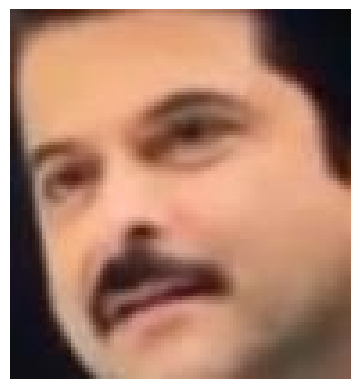

In [56]:
np.random.seed(10)
idx = np.random.choice(train.index)
img_name = train.ID[idx]
img = imageio.imread(os.path.join('/content/drive/MyDrive/Deep_Learning/Project/Age_Group_Prediction/Training_data/Train', img_name))
print('Age group:', train.Class[idx])
plt.imshow(img)
plt.axis('off')
plt.show()

In [57]:
# Image resizing of train data into single numpy array
temp = []
for img_name in train.ID:
    img_path = os.path.join('/content/drive/MyDrive/Deep_Learning/Project/Age_Group_Prediction/Training_data/Train', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')
    temp.append(img)

<ipython-input-57-6634f5c7f42e>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [58]:
train_x = np.stack(temp)

In [59]:
# Image resizing of train data into single numpy array
temp = []
for img_name in test.ID:
    img_path = os.path.join('/content/drive/MyDrive/Deep_Learning/Project/Age_Group_Prediction/Testing_data/Test', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')
    temp.append(img)

<ipython-input-59-227db32277c0>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [60]:
test_x = np.stack(temp)

In [61]:
# Normalizing the images
train_x = train_x / 255.
test_x = test_x / 255.


In [62]:
# Encoding the categorical variable to numeric
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = to_categorical(train_y)

In [63]:
# Specifying all the parameters we will be using in our network
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3
epochs = 5
batch_size = 128


In [64]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])


In [65]:
# Printing model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 500)               1536500   
                                                                 
 dense_3 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Compiling and Training Network
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [67]:
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1)


Epoch 1/5
156/156 [==============================] - 4s 22ms/step - loss: 0.8964 - accuracy: 0.5667
Epoch 2/5
156/156 [==============================] - 4s 23ms/step - loss: 0.8416 - accuracy: 0.6078
Epoch 3/5
156/156 [==============================] - 4s 25ms/step - loss: 0.8287 - accuracy: 0.6101
Epoch 4/5
156/156 [==============================] - 5s 30ms/step - loss: 0.8122 - accuracy: 0.6245
Epoch 5/5
156/156 [==============================] - 3s 21ms/step - loss: 0.8051 - accuracy: 0.6291


In [68]:
# Training model along with validation data
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)


Epoch 1/5
125/125 [==============================] - 3s 27ms/step - loss: 0.8015 - accuracy: 0.6309 - val_loss: 0.8235 - val_accuracy: 0.6045
Epoch 2/5
125/125 [==============================] - 5s 40ms/step - loss: 0.7921 - accuracy: 0.6397 - val_loss: 0.7789 - val_accuracy: 0.6482
Epoch 3/5
125/125 [==============================] - 3s 27ms/step - loss: 0.7901 - accuracy: 0.6349 - val_loss: 0.7972 - val_accuracy: 0.6341
Epoch 4/5
125/125 [==============================] - 3s 24ms/step - loss: 0.7819 - accuracy: 0.6475 - val_loss: 0.7768 - val_accuracy: 0.6494
Epoch 5/5
125/125 [==============================] - 3s 24ms/step - loss: 0.7803 - accuracy: 0.6458 - val_loss: 0.7719 - val_accuracy: 0.6524


In [69]:
# Predicting and importing the result in a csv file
# Assuming you have imported necessary libraries and loaded your model and data

# Predicting probabilities for each class
pred_probs = model.predict(test_x)

# Getting the index of the class with the highest probability for each sample
pred_indices = pred_probs.argmax(axis=-1)

# Converting indices to class labels using the inverse_transform method (assuming lb is your label binarizer)
pred_labels = lb.inverse_transform(pred_indices)

# Adding the predicted class labels to the test DataFrame
test['Class'] = pred_labels

# Saving the DataFrame to a CSV file
test.to_csv('out.csv', index=False)



208/208 [==============================] - 1s 6ms/step


1/1 [==============================] - 0s 32ms/step


<ipython-input-70-47432cedef5f>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join('/content/drive/MyDrive/Deep_Learning/Project/Age_Group_Prediction/Testing_data/Test', img_name))


Original: MIDDLE Predicted: MIDDLE


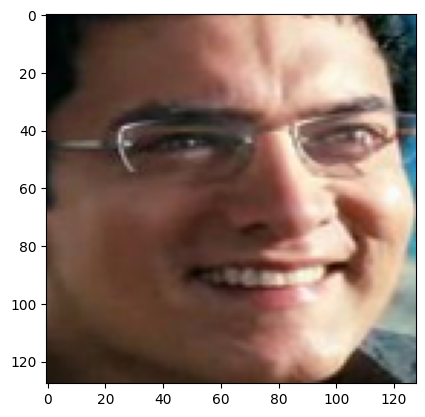

In [70]:
idx = 2481
img_name = test.ID[idx]
img = imageio.imread(os.path.join('/content/drive/MyDrive/Deep_Learning/Project/Age_Group_Prediction/Testing_data/Test', img_name))
plt.imshow(np.array(Image.fromarray(img).resize((128, 128))))

# Get the predicted probabilities for the specific image
pred_probs = model.predict(np.expand_dims(test_x[idx], axis=0))

# Get the index of the predicted class with the highest probability
pred_index = pred_probs.argmax(axis=-1)[0]

# Get the corresponding class label from the label binarizer
pred_label = lb.classes_[pred_index]

print('Original:', test.Class[idx], 'Predicted:', pred_label)

